# Chapter 16 exercise solutions

In [8]:
import numpy as np
import matplotlib.pyplot as plt

5. Write a function my_lin_regression(f, x, y) where f is a list containing function objects to 
basis functions, and x and y are arrays containing noisy data. Assume that x and y are the same size. 
Let an estimation function for the data contained in x and y be deﬁned as $yˆ(x) = β(1) · f_1(x) + 
β(2) · f_2(x) + · · · + β(n) · f_n(x)$, where n is the length of f. Your function should compute beta 
according to the least squares regression formula.

In [9]:
def my_lin_regression(f, x, y):
    A = np.column_stack([fi(x) for fi in f])  # Each column is f_i(x)
    # Compute the least squares solution: beta = (A^T A)^(-1) A^T y
    beta = np.linalg.inv(A.T @ A) @ A.T @ y
    return beta


In [13]:
x = np.linspace(0, 2*np.pi, 1000)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))
f = [np.sin, np.cos]
beta = my_lin_regression(f, x, y)

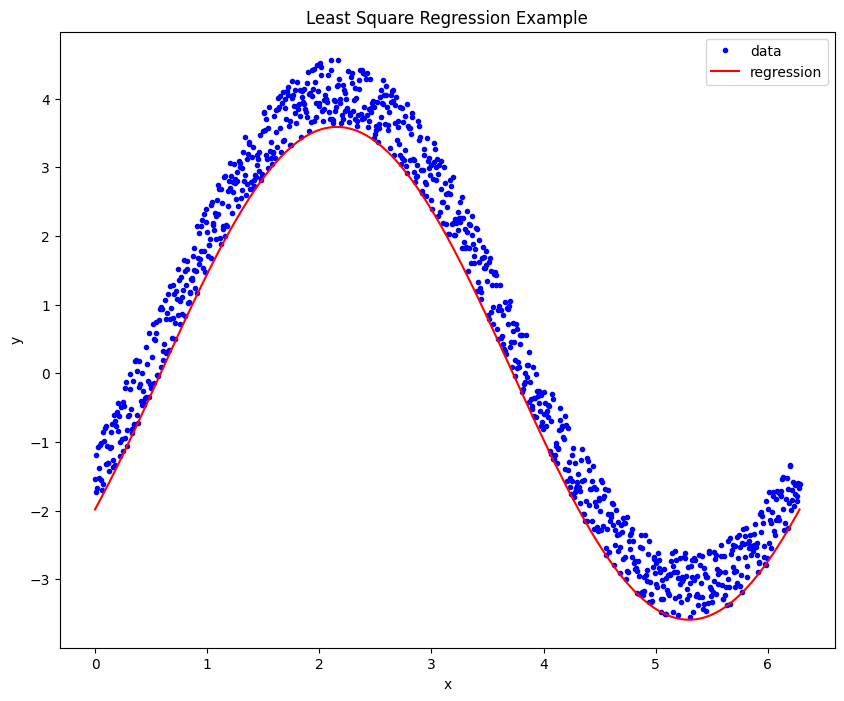

In [14]:
plt.figure(figsize = (10,8))
plt.plot(x,y,"b.", label = "data")
plt.plot(x, beta[0]*f[0](x)+beta[1]*f[1](x), "r", label="regression")
plt.xlabel("x") 
plt.ylabel("y") 
plt.title("Least Square Regression Example")
plt.legend() 
plt.show()

6. Write a function my_exp_regression (x,y) where x and y are arrays of the same size.
Let an estimation function for the data contained in x and y be deﬁned as $yˆ(x) = αe^{\beta x}
$. Your function should compute α and β to solve the least squares regression formula.

In [15]:
def my_exp_regression(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
    alpha = np.exp(log_alpha)
    return alpha, beta 

In [16]:
x = np.linspace(0, 1, 1000)
y = 2*np.exp(-0.5*x) + 0.25*np.random.random(len(x))

alpha, beta = my_exp_regression(x, y)

alpha=2.119818937297601, beta=-0.45993703211403864


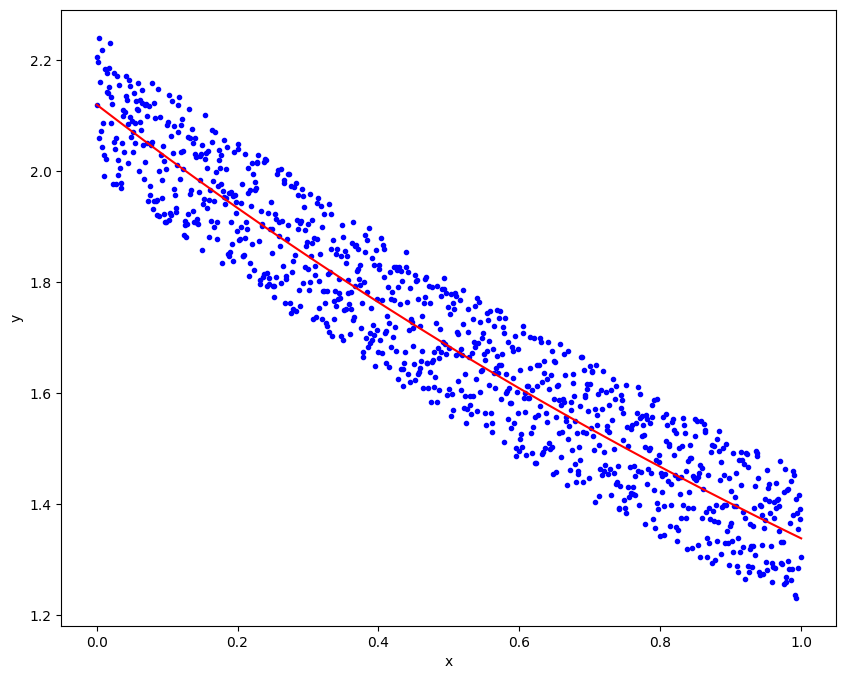

In [17]:
print(f"alpha={alpha}, beta={beta}")
plt.figure(figsize = (10,8)) 
plt.plot(x, y, "b.")
plt.plot(x, alpha*np.exp(beta*x), "r")
plt.xlabel("x") 
plt.ylabel("y") 
plt.show()